In [20]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Explore data

In [4]:
df = pd.read_csv('/Users/jackcook/Documents/Course notes/Data Sources/3.01. Country clusters.csv')

In [8]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [38]:
df_mapped = df.copy()
df_mapped['Language'] = df_mapped['Language'].map({'English':0,'French':1,'German':2})

In [39]:
df_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Plot data

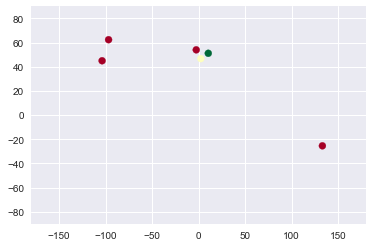

In [56]:
plt.scatter(df_mapped.Longitude, df_mapped.Latitude, c=df_mapped.Language, cmap='RdYlGn')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select features

In [70]:
# iloc uses indices, loc uses named references
x = df_mapped.iloc[:, 1:4]
#x = df_mapped[['Latitude','Longitude', 'Language']] # Same result!
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [62]:
kmeans = KMeans(3) # 3 clusters

In [63]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Results

In [64]:
identified_clusters = kmeans.fit_predict(x) # Return clusters
identified_clusters

array([0, 0, 2, 2, 2, 1], dtype=int32)

In [65]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


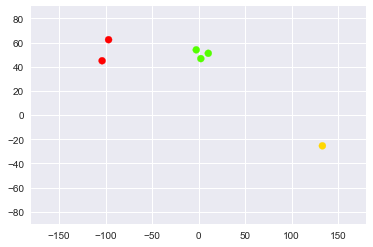

In [66]:
plt.scatter(df.Longitude, df.Latitude, c=data_with_clusters['Cluster'], cmap = 'prism')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting n clusters

We want to pick a minimum number of clusters where adding additional clusters doesn't significantly decrease the Within Cluster Sum of Squares (WCSS - distance from centroid). 

The WCSS is returned from KMeans.inertia_

In [79]:
wcss = []

for i in range(6):
    kmeans = KMeans(i+1)
    kmeans.fit(x)
    wcss.append([i+1, kmeans.inertia_])

df = pd.DataFrame(columns={'Number of clusters','WCSS'}, data=wcss)
df

,Number of clusters,WCSS
0,1,42605.413567
1,2,13208.958120
2,3,290.105233
3,4,113.912333
4,5,39.006250
5,6,0.000000


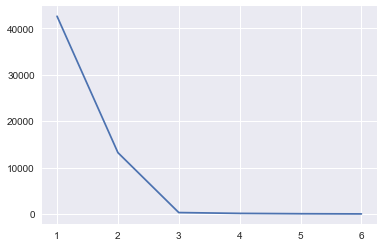

In [80]:
plt.plot(df['Number of clusters'],df['WCSS'])
plt.show()